# Loading Dependencies
---

In [1]:
import sys

if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/gdrive')

    !pip3 install yfinance && pip3 install pdfplumber && pip3 install python-bcb
    !rm -rf github && mkdir github && cd github && git clone --branch master https://github.com/dr315/Finances.git
    sys.path.append('/content/github/Finances')
    root = '/content/gdrive/MyDrive/'
else:
    root = '/home/doreis/Documents/' if sys.platform == 'linux' else 'd:/'
root += 'Investing'

import pandas as pd
pd.options.display.float_format = '${:,.2f}'.format
import matplotlib.pyplot as plt
import ipywidgets as widgets
from Wallet import *

# Computing


In [2]:
# config = Input(broker=Broker.TRADING212,\
#      statement_dir=f"{root}/transactions_trading212" )

config = Input(broker=Broker.TDAMERITRADE,statement_dir=f"{root}/transactions_td_ameritrade",\
                recommended_wallet=f"{root}/transactions_td_ameritrade/global_wallet.json" )

wallet = Wallet(root + "/wallet")
wallet.run(input=config)

[*********************100%***********************]  34 of 34 completed

ERROR 
1 Failed download:
ERROR ['0']: Exception('0: No timezone found, symbol may be delisted')



[*********************100%***********************]  4 of 4 completed
Executed in 7.646746397018433 seconds


# Performance Snapshot

In [3]:
wallet.snapshot_view

,USD,%
Item,,
Equity,"23,110.66",99.4%
Cost,"23,254.67",100.0%
Expenses,0.00,0.0%
Paper profit,-144.02,-0.6%
Realized profit,"1,685.22",7.2%
Dividends,132.53,0.6%
Total Profit,"1,673.74",7.2%
Selic,0.00,18.7%
Ibov,0.00,-1.6%


# Portifolio


In [4]:
wallet.portfolio_df

,PM,PRICE,QUANTITY,COST,MKT_VALUE,DIVIDENDS,GAIN($),GAIN+DIV($),GAIN(%),GAIN+DIV(%),ALLOCATION,TARGET,TOP_PRICE,PRIORITY,BUY
SYMBOL,,,,,,,,,,,,,,,
CCJ,$ 17.01,$ 35.47,3,$ 51.02,$ 106.42,$ 1.36,$ 55.40,$ 56.76,108.57%,111.24%,0.46%,9.00%,$ 30.00,5,55.6
CROX,$ 95.98,$ 94.12,18,"$ 1,727.64","$ 1,694.16",$ 0.00,$ -33.48,$ -33.48,-1.94%,-1.94%,7.33%,8.50%,$ 65.00,10,2.9
GLTR,$ 90.75,$ 87.92,19,"$ 1,724.16","$ 1,670.44",$ 0.00,$ -53.72,$ -53.72,-3.12%,-3.12%,7.23%,7.00%,$ 96.50,3,-0.6
HEES,$ 44.88,$ 44.07,2,$ 89.75,$ 88.14,$ 0.00,$ -1.61,$ -1.61,-1.79%,-1.79%,0.38%,8.50%,$ 43.00,11,42.6
KWEB,$ 32.60,$ 27.26,64,"$ 2,086.53","$ 1,744.96",$ 25.80,$ -341.57,$ -315.77,-16.37%,-15.13%,7.55%,8.50%,$ 55.00,2,8.0
NFLX,$ 363.00,$ 410.35,3,"$ 1,088.99","$ 1,231.05",$ 0.00,$ 142.05,$ 142.05,13.04%,13.04%,5.33%,8.00%,$ 410.00,9,1.5
PRIM,$ 24.02,$ 33.84,35,$ 840.60,"$ 1,184.40",$ 6.80,$ 343.80,$ 350.60,40.90%,41.71%,5.12%,8.00%,$ 30.00,7,19.6
QID,$ 15.44,$ 14.02,125,"$ 1,930.33","$ 1,752.50",$ 11.33,$ -177.83,$ -166.50,-9.21%,-8.63%,7.58%,7.00%,$ 21.50,4,-9.6
SEDG,$ 161.53,$ 160.44,6,$ 969.20,$ 962.64,$ 0.00,$ -6.56,$ -6.56,-0.68%,-0.68%,4.17%,4.00%,$ 200.00,11,-0.2


# Realized Profit


In [5]:
wallet.realized_profit_pivot_all

Month,January,February,March,April,May,June,July,August,September,October,November,Total
Year,,,,,,,,,,,,
2021,0.00,0.00,0.00,0.00,0.00,0.00,3.15,41.52,159.36,0.00,4.50,208.53
2022,0.54,0.00,18.98,219.16,0.00,553.74,36.36,0.00,-1.69,98.38,47.51,972.98
2023,0.00,-303.84,-256.26,0.00,59.96,178.66,-309.26,"1,134.46",0.00,0.00,0.00,503.72
Total,0.54,-303.84,-237.28,219.16,59.96,732.39,-269.75,"1,175.98",157.67,98.38,52.01,"1,685.22"


In [6]:
wallet.realized_profit_pivot_fii

""


In [7]:
wallet.realized_profit_pivot_stock

Month,January,February,March,April,May,June,July,August,September,October,November,Total
Year,,,,,,,,,,,,
2021,0.00,0.00,0.00,0.00,0.00,0.00,3.15,41.52,159.36,0.00,4.50,208.53
2022,0.54,0.00,18.98,219.16,0.00,553.74,36.36,0.00,-1.69,98.38,47.51,972.98
2023,0.00,-303.84,-256.26,0.00,59.96,178.66,-309.26,"1,134.46",0.00,0.00,0.00,503.72
Total,0.54,-303.84,-237.28,219.16,59.96,732.39,-269.75,"1,175.98",157.67,98.38,52.01,"1,685.22"


In [8]:
wallet.realized_profit_df

,DATE,SYMBOL,TYPE,AMOUNT,Profit,DayTrade
0,2021-07-23,CSCO,STOCK,$ 55.16,$ 3.15,0.0
1,2021-08-24,HOLI,STOCK,$ 117.42,$ 41.52,0.0
2,2021-09-14,LI,STOCK,$ 357.60,$ 128.60,0.0
3,2021-09-15,LUMN,STOCK,$ 507.40,$ 8.38,0.0
4,2021-09-20,INVA,STOCK,$ 96.00,$ 22.38,0.0
5,2021-11-04,EA,STOCK,$ 146.00,$ 4.50,0.0
6,2022-01-24,NEM,STOCK,$ 126.20,$ 0.54,0.0
7,2022-03-09,VYGR,STOCK,$ 140.40,$ 18.98,0.0
8,2022-04-29,TMV,STOCK,$ 655.09,$ 219.16,0.0
9,2022-06-06,TMV,STOCK,$ 849.56,$ 351.35,0.0


In [9]:
wallet.realized_profit_by_symbol_df

,SYMBOL,Profit
0,AEO,$ -1.69
1,AFYA,$ 87.13
2,CCJ,$ 104.90
3,CENTA,$ -25.51
4,COIN,$ 2.71
5,CPRI,"$ 1,037.37"
6,CSCO,$ 3.15
7,EA,$ 4.50
8,GOOGL,$ 0.99
9,HOLI,$ 41.52


# Dividends by month

In [10]:
wallet.prov_month

DATE    USD
MONTH  SYMBOL                   
July   PRIM    2023-07-14 $ 2.10
                          $ 2.10
August VZ      2023-08-01 $ 6.53
       LAKE    2023-08-22 $ 0.06
                          $ 6.59

In [11]:
wallet.pvt_div_table

Month,January,February,April,May,June,July,August,September,October,November,December,Total
Year,,,,,,,,,,,,
2021,$ 0.00,$ 0.00,$ 0.00,$ 0.00,$ 4.77,$ 0.37,$ 4.39,$ 11.27,$ 0.00,$ 5.76,$ 27.43,$ 53.99
2022,$ 1.56,$ 6.40,$ 1.56,$ 6.40,$ 0.00,$ 2.34,$ 6.40,$ 0.00,$ 1.80,$ 6.53,$ 3.60,$ 36.59
2023,$ 1.80,$ 6.59,$ 2.10,$ 6.59,$ 16.18,$ 2.10,$ 6.59,$ 0.00,$ 0.00,$ 0.00,$ 0.00,$ 41.95
Total,$ 3.36,$ 12.99,$ 3.66,$ 12.99,$ 20.95,$ 4.81,$ 17.38,$ 11.27,$ 1.80,$ 12.29,$ 31.03,$ 132.53


# Plots

## Historical profitability

In [12]:
periodPicker = widgets.Dropdown(options=['1 year', '2 years', 'All'], value='1 year')
periodPicker

Dropdown(options=('1 year', '2 years', 'All'), value='1 year')

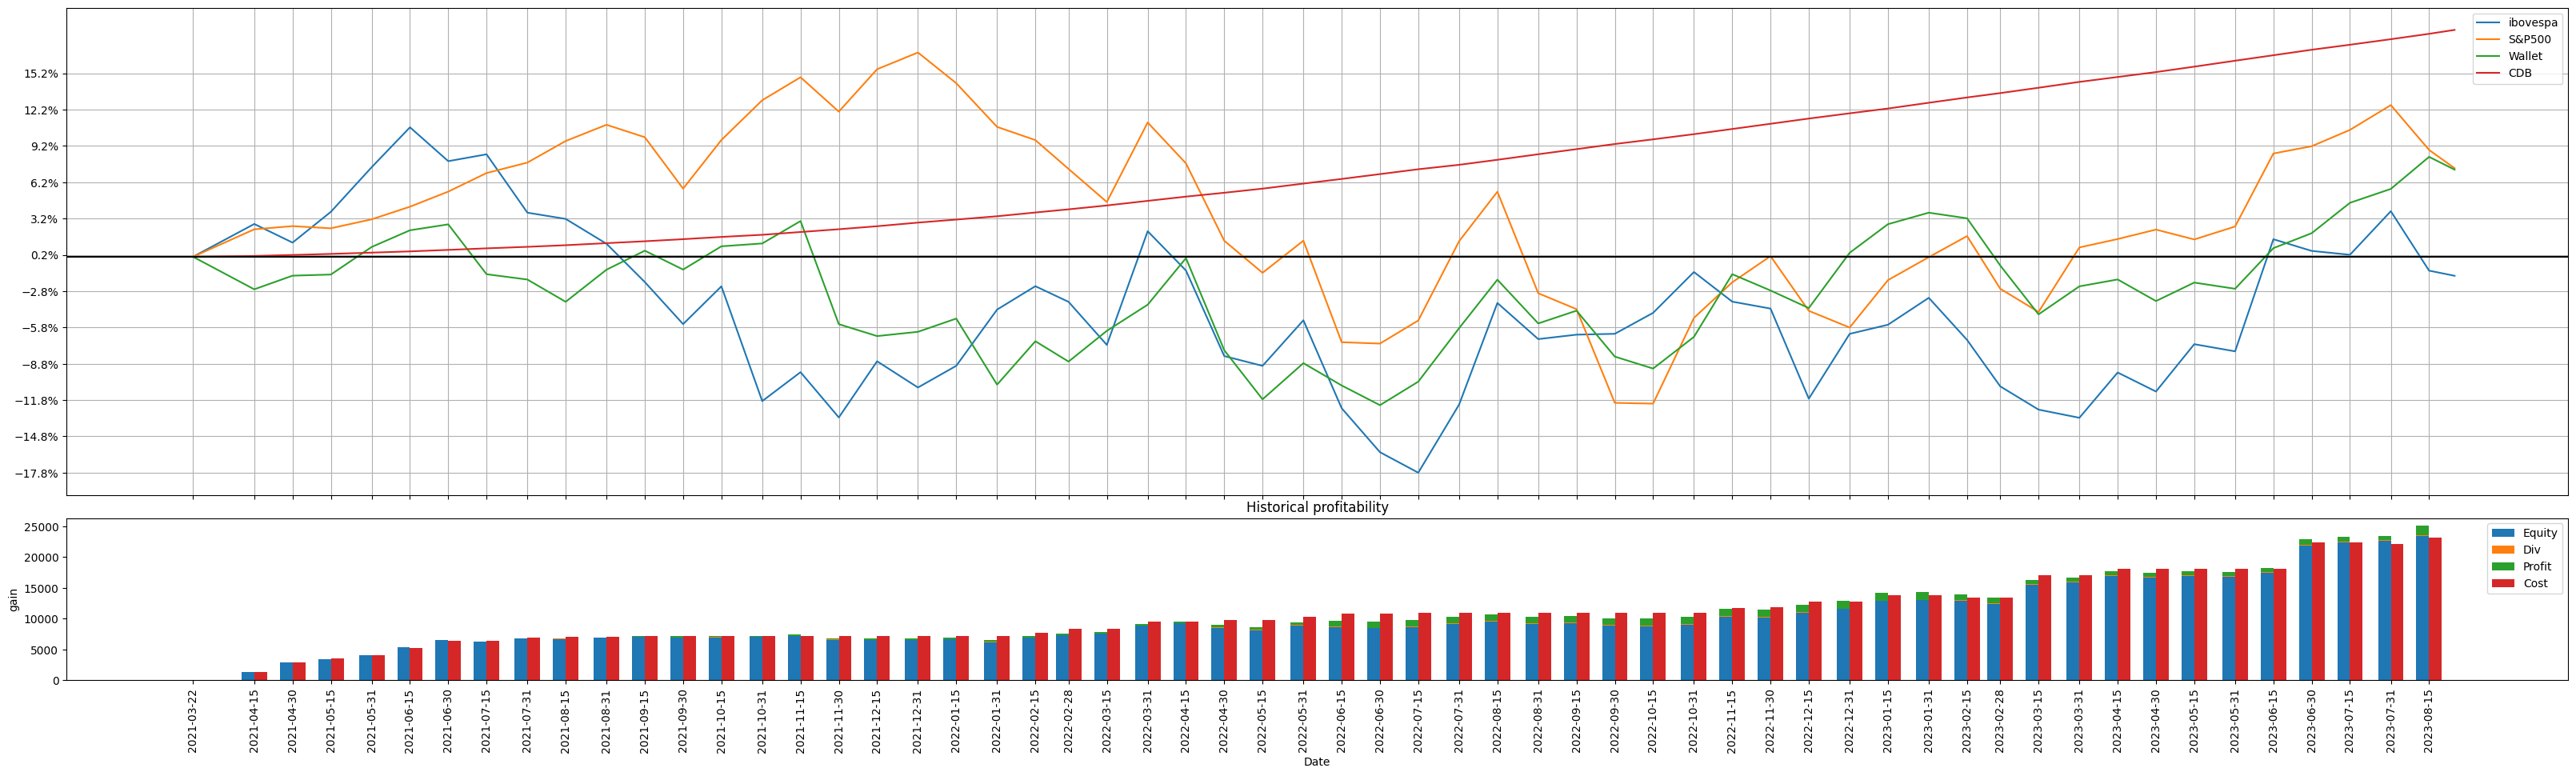

In [13]:
wallet.generate_charts()